In [1]:
import sys
sys.path.append("..")
import Templates.tools.multivariate as mv
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[rank: 0] Global seed set to 0


In [2]:
adata = sc.read("/gstore/data/project/crc_recursion_gw/crc-NGS5186//DS000015340/qc_embedding.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 321358 × 33908
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    var: 'Symbol'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,gene_symbol,class,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,S_score,G2M_score,phase,SCN_class
SAM24434749_rep1-AAACCCAAGATTAGCA,SAM24434749_rep1,AAACCCAAGATTAGCA,singlet,ENSG00000074771_1,singlet,SAM24434722,DLD1,day5,NOX3,target,4965,16707,464,2.777279,3603,21.565811,0.013953,-0.417101,S,Untreatedclus_DLD1
SAM24434749_rep1-AAACCCAAGATTGACA,SAM24434749_rep1,AAACCCAAGATTGACA,singlet,ENSG00000157703_1,singlet,SAM24434748,DLD1,day5,SVOPL,target,2608,9568,263,2.748746,3126,32.671405,-0.023256,-0.065538,G1,Untreatedclus_DLD1
SAM24434749_rep1-AAACCCAAGCATTTCG,SAM24434749_rep1,AAACCCAAGCATTTCG,singlet,ENSG00000178015_2,singlet,SAM24434723,DLD1,day5,GPR150,target,2910,9185,76,0.827436,2198,23.930321,-0.516279,0.478009,G2M,DOXclus_DLD1
SAM24434749_rep1-AAACCCAAGCTGAGCA,SAM24434749_rep1,AAACCCAAGCTGAGCA,singlet,ENSG00000186469_2,singlet,SAM24434722,DLD1,day5,GNG2,target,4980,18377,654,3.558796,4596,25.009523,-0.306977,0.322917,G2M,Untreatedclus_DLD1
SAM24434749_rep1-AAACCCAAGCTTACGT,SAM24434749_rep1,AAACCCAAGCTTACGT,singlet,ENSG00000133789_4,singlet,SAM24434748,DLD1,day5,SWAP70,target,3641,15314,233,1.521484,4062,26.524749,-0.079070,0.150174,G2M,Untreatedclus_DLD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24434749_rep20-TTTGTTGTCACTAGCA,SAM24434749_rep20,TTTGTTGTCACTAGCA,singlet,ENSG00000130165_1,singlet,SAM24434722,DLD1,day5,ELOF1,target,2041,5961,84,1.409160,1822,30.565341,-0.200636,-0.072502,G1,Untreatedclus_DLD1
SAM24434749_rep20-TTTGTTGTCATGCCAA,SAM24434749_rep20,TTTGTTGTCATGCCAA,singlet,ENSG00000181218_2,singlet,SAM24434722,DLD1,day5,H2AW,target,3116,8677,362,4.171949,2054,23.671776,-0.172225,-0.064291,G1,Untreatedclus_DLD1
SAM24434749_rep20-TTTGTTGTCCAGTGCG,SAM24434749_rep20,TTTGTTGTCCAGTGCG,singlet,ENSG00000079459_4,singlet,SAM24434723,DLD1,day5,FDFT1,target,3492,11482,69,0.600941,3138,27.329733,-0.825581,1.164046,G2M,Untreatedclus_DLD1
SAM24434749_rep20-TTTGTTGTCGCTGATA,SAM24434749_rep20,TTTGTTGTCGCTGATA,singlet,ENSG00000224383_2,singlet,SAM24434748,DLD1,day5,PRR29,target,1438,4141,11,0.265636,1266,30.572326,-0.156209,-0.352201,G1,Untreatedclus_DLD1


In [5]:
adata2 = sc.read("/gstore/scratch/u/ghaffars/Dataset/Replogle/K562_gwps_raw_singlecell_MV.h5ad")

In [6]:
adata2.obs["gene"].unique()

['SNAPC4', 'INO80B', 'REST', 'NTC', 'MRPL18', ..., 'CPSF2', 'GTF2F2', 'RUVBL2', 'RPS8', 'LIN52']
Length: 451
Categories (451, object): ['ACIN1', 'ACTG1', 'ACTR5', 'ACTR6', ..., 'YY1', 'ZNF516', 'ZRANB2', 'NTC']

In [9]:
A = adata2.obs["gene"].tolist()

In [11]:
adata = adata[adata.obs["gene_symbol"].isin(A)].copy()

In [12]:
adata

AnnData object with n_obs × n_vars = 31719 × 33908
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    var: 'Symbol'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [13]:
adata.obs["gene_symbol"].unique()

['NTC', 'HYOU1', 'TJP1', 'SRF', 'DNMT3B', ..., 'PSMA6', 'BCAS2', 'PSMC6', 'RAD21', 'RAN']
Length: 451
Categories (451, object): ['ACIN1', 'ACTG1', 'ACTR5', 'ACTR6', ..., 'YWHAQ', 'YY1', 'ZNF516', 'ZRANB2']

In [14]:
perturbations_key = "gene_symbol"
gene_graph, gene_sets = mv.enrichr_to_gene_graph("./data/CORUM.txt", np.array(adata.obs[perturbations_key].values))

In [15]:
embeddings_obj = mv.AnnDataEmbeddings(adata, "X_scVI", perturbations_key, "Sample", "NTC")
perturbation_embeddings = embeddings_obj.get_embeddings_from_list(list(gene_graph), agg=True)

In [16]:
perturbation_embeddings.shape

(429, 40)

Performing Kolmogorov-Smirnov test on gene set cosine similarity..
KS statistic: 0.0703012912482066, p-value: 0.06379920805049014


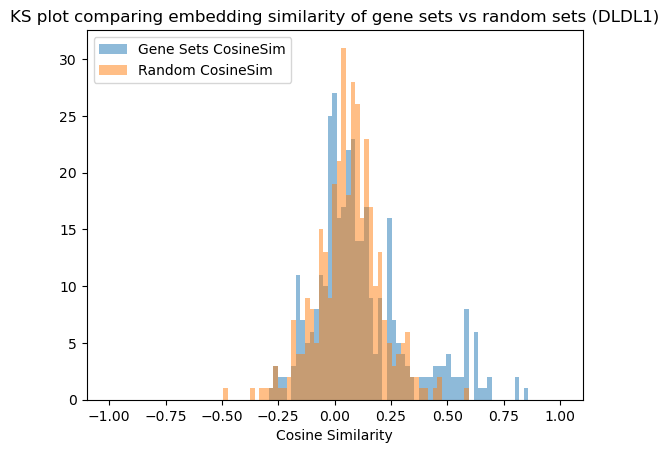

Computing distance matrix for embeddings..
Computing link prediction metrics for cutoff percentile=0%
Computing link prediction metrics for cutoff percentile=1%
Computing link prediction metrics for cutoff percentile=2%
Computing link prediction metrics for cutoff percentile=3%
Computing link prediction metrics for cutoff percentile=4%
Computing link prediction metrics for cutoff percentile=5%
Computing link prediction metrics for cutoff percentile=6%
Computing link prediction metrics for cutoff percentile=7%
Computing link prediction metrics for cutoff percentile=8%
Computing link prediction metrics for cutoff percentile=9%
Computing link prediction metrics for cutoff percentile=10%
Computing link prediction metrics for cutoff percentile=11%
Computing link prediction metrics for cutoff percentile=12%
Computing link prediction metrics for cutoff percentile=13%
Computing link prediction metrics for cutoff percentile=14%
Computing link prediction metrics for cutoff percentile=15%
Computi

In [17]:
# needs to be cached in embeddings_obj
report = mv.evaluate(perturbation_embeddings, gene_graph, gene_sets, percentile_range=[0, 100])

In [18]:
recalls = [report["metrics_by_percentile"][i]["recall"] for i in report["metrics_by_percentile"]]
precisions = [report["metrics_by_percentile"][i]["precision"] for i in report["metrics_by_percentile"]]
tprs = [report["metrics_by_percentile"][i]["TPR"] for i in report["metrics_by_percentile"]]
fprs = [report["metrics_by_percentile"][i]["FPR"] for i in report["metrics_by_percentile"]]

In [19]:
report["metrics_by_percentile"][95]

{'recall': 0.23622047244094488,
 'precision': 0.040048948715096226,
 'f1_score': 0.06848663559402644,
 'TPR': 0.23622047244094488,
 'FPR': 0.0955782991072418}

In [20]:
report["metrics_by_percentile"][90]

{'recall': 0.35039370078740156,
 'precision': 0.029355175636303667,
 'f1_score': 0.0541719502916561,
 'TPR': 0.35039370078740156,
 'FPR': 0.19557608382623337}

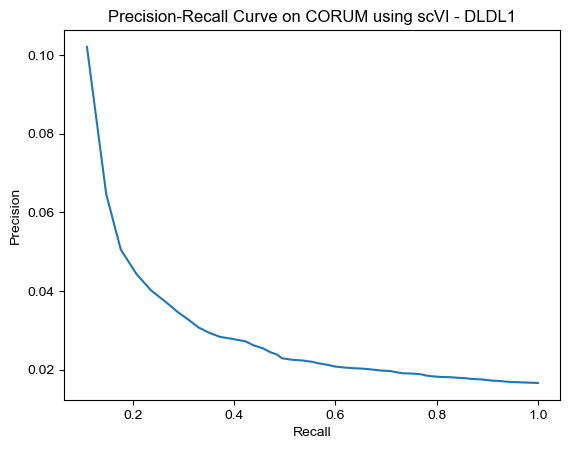

In [21]:
# put plots in a plotting module file
# plots should be generated from embeddings_obj or report
plt.plot(recalls, precisions)
sns.set_color_codes("pastel")
sns.set_theme()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve on CORUM using scVI - DLDL1")
plt.show()

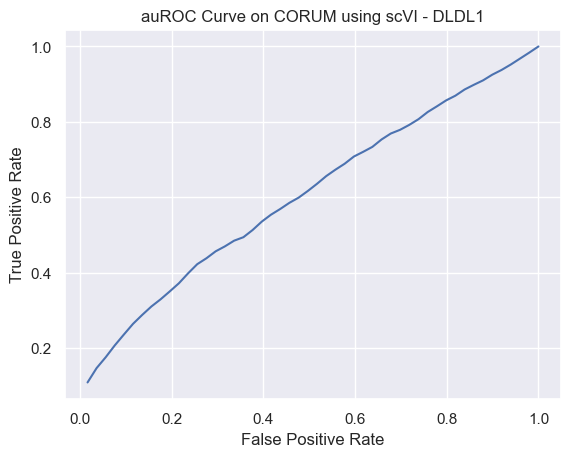

In [22]:
plt.plot(fprs, tprs)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("auROC Curve on CORUM using scVI - DLDL1")
plt.show()

In [23]:
adata.uns["multivariate_report"] = {"roc_auc": report["roc_auc"], "auprc": report["auprc"]}

In [16]:
#adata.write_h5ad("/gstore/data/project/crc_recursion_gw/crc-NGS5186/DS000015340/Multivariate_complete.h5ad")

In [24]:
adata

AnnData object with n_obs × n_vars = 31719 × 33908
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    var: 'Symbol'
    uns: 'perturbation_embeddings', 'perturbations', 'multivariate_report'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [25]:
adata.uns['multivariate_report']

{'roc_auc': 0.602053606195484, 'auprc': 0.024996790983664342}

In [26]:
metrics = pd.DataFrame.from_dict(report["metrics_by_percentile"],orient='index')

In [27]:
metrics["percentile"] = metrics.index

In [28]:
metrics[metrics.percentile>89]

,recall,precision,f1_score,TPR,FPR,percentile
90,0.350394,0.029355,0.054172,0.350394,0.195576,90
91,0.329396,0.030703,0.056171,0.329396,0.175539,91
92,0.310367,0.032598,0.059000,0.310367,0.155479,92
93,0.288058,0.034652,0.061861,0.288058,0.135464,93
94,0.264436,0.037215,0.065247,0.264436,0.115483,94
95,0.236220,0.040049,0.068487,0.236220,0.095578,95
96,0.207349,0.044208,0.072878,0.207349,0.075674,96
97,0.175853,0.050490,0.078454,0.175853,0.055825,97
98,0.146982,0.064609,0.089762,0.146982,0.035921,98
99,0.108924,0.102028,0.105363,0.108924,0.016183,99


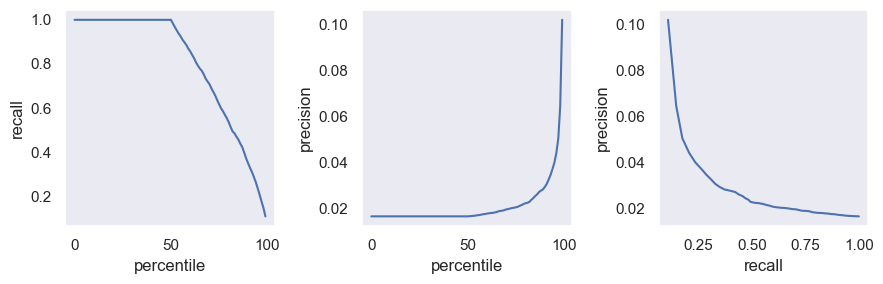

In [29]:
_, axs = plt.subplots(1, 3, figsize=np.array([3, 1]) * 3)
xy = [("percentile", "recall"), ("percentile", "precision"), ("recall", "precision")]
for (x, y), ax in zip(xy, axs.flat):
    ax.plot(metrics[x], metrics[y])
    ax.grid()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
plt.tight_layout()